In [183]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time
import pandas as pd

In [22]:
%run Batch_ArtifactFilter_Epoch.ipynb

In [23]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20140205\\20140205_1230.set')

Reading C:\USB Drive\NewEEG-200s\SA20140205\20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...
5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
time difference 1.3828125
[6412    0    4]
[7120    0  130]

 **1 bad trials dropped**
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   47.8s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:  1.0min finished


5565 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128


C:\Users\new user\New folder\envs\py36\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Fitting ICA took 528.5s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1977 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1977 events and 500 original time points ...
999 bad epochs dropped


In [4]:
epoch.get_data().shape

(978, 129, 500)

In [5]:
epoch.get_data()[1,1,:].shape

(500,)

In [6]:
epoch.get_data()[1,1,10:20].shape

(10,)

In [13]:
newdata=epoch.get_data()

In [33]:
newdata.shape

(978, 129, 500)

In [30]:
newdata=epoch.get_data()[1,1,:]

In [34]:
newdata.shape

(978, 129, 500)

In [37]:
i=50
j=0
newdata1=[]
for i in range(len(newdata)):
    if i%50==0:
        newdata1[1,1,j]=np.mean(newdata[1,1,i-50:i])
        j=j+1
        

C:\Users\new user\New folder\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\new user\New folder\envs\py36\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: list indices must be integers or slices, not tuple

In [12]:
data=epoch.get_data()[1,1,0:50]

In [14]:
data.shape
np.mean(data)

7.165616812570589e-06

In [16]:
data=epoch.get_data()[1,1,51:100]
np.mean(data)

7.2089609653992385e-06

In [25]:
newdata.shape

(978, 129, 500)

In [ ]:
 final_variances = []
    for d in data:
    #     print (data.shape)
        variances = []
        skewnesses = []
        kurtosises = []
        stats = []
        for channel in 
    #         print(channel.shape)
            var = channel.var()
            variances.append(var)
            
            skewness = skew(channel, axis=0)
#             print(skewness)

            skewnesses.append(skewness)
#             print(skewness)
            kurt = kurtosis(channel)
            kurtosises.append(kurt)
#         print(skewnesses)
#         mean_skew = np.mean(skewnesses)
#         stats.append(mean_skew)
#         stats.append(np.mean(variances))
        final_variances.append([np.mean(variances), np.mean(skewnesses), np.mean(kurtosises)])

In [41]:
for d in newdata:
    for channel in d:
        print(channel.shape)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)

In [42]:
final_variances = []
final_variances.append()

NameError: name 'variances' is not defined

In [14]:
newdata=epoch.get_data()
data=[]
for d in newdata:
    mean1=[]
    mean2=[]
    mean3=[]
    mean4=[]
    mean5=[]
    mean6=[]
    mean7=[]
    mean8=[]
    mean9=[]
    mean10=[]
    #   print (data.shape)
    for channel in d:
        mean1.append(np.mean(channel[0:50]))
        mean2.append(np.mean(channel[51:100]))
        mean3.append(np.mean(channel[101:150]))
        mean4.append(np.mean(channel[151:200]))
        mean5.append(np.mean(channel[201:250]))
        mean6.append(np.mean(channel[251:300]))
        mean7.append(np.mean(channel[301:350]))
        mean8.append(np.mean(channel[351:400]))
        mean9.append(np.mean(channel[401:450]))
        mean10.append(np.mean(channel[451:500]))
    data.append([mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10])

In [15]:
array=np.array(data)

In [16]:
array.shape

(978, 10, 129)

In [15]:
array

array([[[-1.08145471e-05, -1.58507429e-06, -9.81113274e-07, ...,
          1.91042720e-06,  2.34733481e-06,  0.00000000e+00],
        [-1.15003665e-05, -2.24878401e-06, -1.68162510e-06, ...,
          1.70502828e-06,  2.51296343e-06,  0.00000000e+00],
        [-1.09414824e-05, -1.29867980e-06, -6.56895669e-07, ...,
          1.67945727e-06,  2.34705696e-06,  6.85714286e+00],
        ...,
        [-1.08464451e-05, -1.85894052e-06, -6.92061049e-07, ...,
          1.97558029e-06,  2.67715323e-06,  8.16326531e-02],
        [-1.07694052e-05, -1.84541962e-06, -1.23110710e-06, ...,
          2.14799155e-06,  2.61174954e-06,  2.69387755e+00],
        [-1.12748289e-05, -1.95272328e-06, -1.29131213e-06, ...,
          1.76054539e-06,  2.46055705e-06,  0.00000000e+00]],

       [[ 8.47960562e-07,  7.16561681e-06,  5.81322579e-06, ...,
         -2.95130720e-06, -2.00409565e-06,  1.20000000e-01],
        [-3.94704300e-07,  7.20896097e-06,  5.17586920e-06, ...,
         -3.44041538e-06, -3.23059524e

In [61]:
final_variances = []
for d in newdata:
    #     print (data.shape)
    variances = []
    skewnesses = []
    kurtosises = []
    stats = []
    for channel in d:
    #         print(channel.shape)
        var = channel.var()
        variances.append(var)
            
        skewness = skew(channel, axis=0)
#             print(skewness)

        skewnesses.append(skewness)
#             print(skewness)
        kurt = kurtosis(channel)
        kurtosises.append(kurt)
#         print(skewnesses)
#         mean_skew = np.mean(skewnesses)
#         stats.append(mean_skew)
#         stats.append(np.mean(variances))
    final_variances.append([variances, skewnesses, kurtosises])

In [63]:
array= np.array(final_variances)
array.shape

(978, 3, 129)

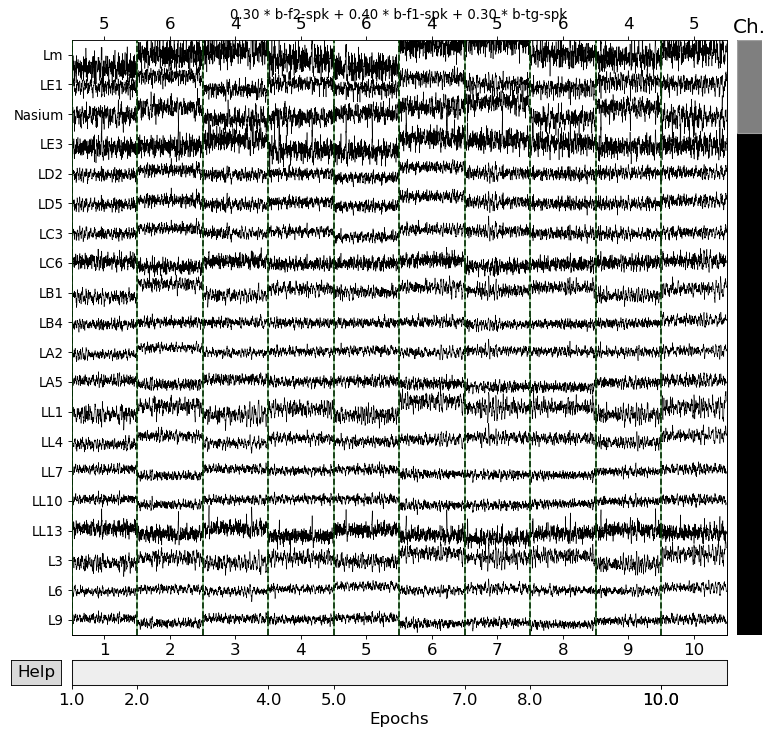

In [16]:
epoch[0:10].plot()

In [17]:
newdata

array([[[ 0.00000000e+00, -2.16921834e-06, -1.88578511e-05, ...,
         -1.33270010e-05, -9.43680636e-06, -5.13907325e-06],
        [ 0.00000000e+00, -1.88748640e-06, -3.00483472e-06, ...,
         -7.39394648e-06, -5.23016084e-06, -1.03608231e-06],
        [ 0.00000000e+00, -7.14072830e-06, -3.38327939e-06, ...,
         -3.10231709e-06, -4.00582565e-06,  1.05202493e-06],
        ...,
        [ 0.00000000e+00,  5.14900611e-06,  1.85836732e-06, ...,
         -1.24586410e-06, -1.50281976e-06,  7.05026872e-07],
        [ 0.00000000e+00,  1.50326309e-06,  2.04189663e-06, ...,
         -1.52891761e-06, -1.58974603e-06,  7.22828572e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00, -2.89037312e-06, -6.02460248e-06, ...,
         -4.31290061e-06,  3.60683901e-06,  1.08879026e-05],
        [ 0.00000000e+00, -1.35766065e-06,  5.04398277e-06, ...,
          7.78940244e-06,  1.06339557e

Dropped 0 epochs
Channels marked as bad: []


In [18]:
newdata.shape

(978, 129, 500)

In [40]:
newdata[7,1,:]

array([ 0.00000000e+00,  2.75391697e-06,  3.44552379e-06,  1.43317568e-06,
        1.06222182e-06,  2.13722213e-06,  2.98919148e-07, -5.42222787e-07,
       -1.82588102e-06, -2.42203021e-06,  5.03801026e-07, -5.05205579e-08,
       -2.24410103e-06, -1.70317617e-06, -6.17023666e-06, -6.67644963e-06,
       -2.21504046e-06, -5.11045921e-06, -2.63939407e-06,  2.40203751e-07,
        9.93136171e-08, -2.38857105e-06, -9.15212742e-06, -1.04465695e-05,
       -8.32041219e-06, -4.12592724e-06,  1.14641822e-06,  6.62361703e-06,
        7.78133194e-06,  4.43208097e-07, -8.15826025e-06, -6.83292082e-06,
       -3.86689338e-06, -6.19443686e-06, -4.98875927e-06, -5.23830807e-06,
       -5.92842509e-06, -3.99401159e-06, -3.04994010e-06, -1.85016361e-06,
       -2.57467448e-06, -3.20269321e-06, -4.24398328e-06, -4.84735968e-06,
       -1.50965724e-06, -1.07682148e-06, -8.27571986e-07, -1.67997320e-06,
       -7.95569621e-06, -8.44096279e-06, -2.20289956e-06, -4.47333470e-07,
       -2.61348911e-07,  

In [43]:
array.shape

(978, 10, 129)

In [44]:
newdata=epoch.get_data()
data=[]
for d in newdata:
    mean1=[]
    mean2=[]
    mean3=[]
    mean4=[]
    mean5=[]
    mean6=[]
    mean7=[]
    mean8=[]
    mean9=[]
    mean10=[]
    #   print (data.shape)
    for channel in d:
        mean1.append(np.mean(channel[0:50]))
        mean2.append(np.mean(channel[51:100]))
        mean3.append(np.mean(channel[101:150]))
        mean4.append(np.mean(channel[151:200]))
        mean5.append(np.mean(channel[201:250]))
        mean6.append(np.mean(channel[251:300]))
        mean7.append(np.mean(channel[301:350]))
        mean8.append(np.mean(channel[351:400]))
        mean9.append(np.mean(channel[401:450]))
        mean10.append(np.mean(channel[451:500]))
    data.append([mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10])

In [45]:
data=np.array(data)
olddata=newdata

In [46]:
newdata=data.swapaxes(1,2)

In [47]:
newdata.shape

(978, 129, 10)

In [22]:
olddata[1,1,:]

array([ 0.00000000e+00, -1.35766065e-06,  5.04398277e-06,  9.58098872e-06,
        8.23398520e-06,  6.85851464e-06,  3.38759893e-06,  7.50868129e-06,
        1.18741766e-05,  6.82357305e-06,  8.03419241e-06,  9.51350580e-06,
        7.35557849e-06,  8.19861154e-06,  7.06659811e-06,  7.27607200e-06,
        5.97910998e-06,  1.39251753e-06,  5.73692049e-06,  8.85043857e-06,
        5.60823901e-06,  9.36023208e-06,  1.08426793e-05,  9.70856904e-06,
        1.07597549e-05,  8.70108140e-06,  1.13143831e-05,  1.11563854e-05,
        8.51546882e-06,  1.02569843e-05,  8.09696896e-06,  7.81499789e-06,
        5.13768035e-06, -4.59993374e-08,  4.08474579e-06,  7.45697446e-06,
        1.02173200e-05,  1.31848782e-05,  1.24412072e-05,  1.06294499e-05,
        8.18387737e-06,  9.20999379e-06,  5.79731280e-06,  6.28225893e-06,
        8.05636529e-06,  3.28118257e-06,  4.05178206e-06,  1.48781750e-06,
        2.36239865e-06,  6.96846549e-06,  5.94890152e-06,  6.90094383e-06,
        6.66772373e-06,  

In [48]:
newdata[1,1,:]

array([7.16561681e-06, 7.20896097e-06, 7.22160678e-06, 7.23512767e-06,
       7.12782401e-06, 7.51835466e-06, 7.33882554e-06, 7.23400302e-06,
       6.53827581e-06, 7.69869947e-06])

In [7]:
data=[ 0.00000000e+00, -1.35766065e-06,  5.04398277e-06,  9.58098872e-06,
        8.23398520e-06,  6.85851464e-06,  3.38759893e-06,  7.50868129e-06,
        1.18741766e-05,  6.82357305e-06,  8.03419241e-06,  9.51350580e-06,
        7.35557849e-06,  8.19861154e-06,  7.06659811e-06,  7.27607200e-06,
        5.97910998e-06,  1.39251753e-06,  5.73692049e-06,  8.85043857e-06,
        5.60823901e-06,  9.36023208e-06,  1.08426793e-05,  9.70856904e-06,
        1.07597549e-05,  8.70108140e-06,  1.13143831e-05,  1.11563854e-05,
        8.51546882e-06,  1.02569843e-05,  8.09696896e-06,  7.81499789e-06,
        5.13768035e-06, -4.59993374e-08,  4.08474579e-06,  7.45697446e-06,
        1.02173200e-05,  1.31848782e-05,  1.24412072e-05,  1.06294499e-05,
        8.18387737e-06,  9.20999379e-06,  5.79731280e-06,  6.28225893e-06,
        8.05636529e-06,  3.28118257e-06,  4.05178206e-06,  1.48781750e-06,
        2.36239865e-06,  6.96846549e-06,  5.94890152e-06,  6.90094383e-06,
        6.66772373e-06,  8.79180337e-06,  1.00787222e-05,  8.21182072e-06,
        9.54050309e-06,  9.47217219e-06,  6.85423788e-06,  3.47870997e-06,
        1.50735034e-06, -1.29897489e-08,  5.00492279e-07,  7.31697455e-06,
        1.20459281e-05,  8.39421384e-06,  4.80942128e-06,  6.96779862e-06,
        9.04350300e-06,  8.63902880e-06,  8.05085312e-06,  5.23047726e-06,
        9.40212138e-06,  1.26709890e-05,  2.46464571e-06,  2.06687514e-06,
        7.91219543e-06,  8.54248472e-06,  1.28250819e-05,  1.30146311e-05,
        1.26577672e-05,  1.25356189e-05,  1.20308917e-05,  1.27399534e-05,
        6.41812075e-06,  3.71329391e-06,  5.72344285e-06,  7.31086321e-06,
        4.90460612e-06,  5.46110008e-07,  4.75169176e-06,  7.48770785e-06,
        6.46961520e-06,  8.18466492e-06,  9.88273609e-06,  8.29881192e-06,
        3.68330579e-06,  5.21507530e-06,  5.15914850e-06,  4.13694913e-06,
        9.00508772e-06,  8.38520287e-06,  8.18131481e-06,  7.45762986e-06,
        5.47722134e-06,  8.00021183e-06,  1.36985394e-05,  1.34728713e-05,
        7.95449460e-06,  9.37603656e-06,  8.68519487e-06,  3.27725204e-06,
       -3.46293856e-07,  4.18421279e-06,  4.84074463e-06,  1.82295966e-06,
        9.39693831e-06,  2.66560242e-06, -3.38952908e-06,  6.76475452e-06,
        8.02401538e-06,  9.10555404e-06,  1.18306729e-05,  9.07660481e-06,
        8.81631661e-06,  1.18061902e-05,  1.22891386e-05,  1.15564708e-05,
        9.85638995e-06,  7.25809400e-06,  9.91502814e-06,  1.12601890e-05,
        6.87020766e-06,  6.43254981e-06,  8.77863056e-06,  3.79269070e-06,
        9.54441981e-07,  5.97656036e-06,  9.03657018e-06,  1.04406764e-05,
        8.89165651e-06,  7.12130145e-06,  1.08148517e-05,  9.17995683e-06,
        2.53338046e-06,  2.59390872e-06,  3.52762066e-06,  2.95798079e-06,
        6.10272602e-06,  7.15299788e-06,  6.00094012e-06,  4.35650524e-06,
        3.95927141e-06,  7.87242700e-06,  8.94605801e-06,  8.74916582e-06,
        9.02126455e-06,  8.46481568e-06,  1.05053831e-05,  1.12306684e-05,
        1.07185083e-05,  8.56493621e-06,  5.15254934e-06,  6.15025789e-06,
        5.39449956e-06,  1.49573637e-06,  2.57778296e-06,  8.53729431e-06,
        1.27494202e-05,  1.04519192e-05,  1.08764386e-05,  9.22440428e-06,
        3.17626306e-06,  4.81950873e-06,  6.80044980e-06,  7.58892304e-06,
        5.47640469e-06,  6.28833990e-06,  1.04252604e-05,  9.75347501e-06,
        8.06658178e-06,  3.44867956e-06, -1.11781666e-07,  5.23591377e-06,
        1.17474116e-05,  8.48096212e-06,  1.03049751e-05,  9.78867257e-06,
        8.64342894e-06,  1.48816805e-05,  1.16546121e-05,  1.29818093e-05,
        1.21741392e-05,  6.13102679e-06,  6.55201482e-06,  4.16977898e-06,
        2.25496302e-06, -7.94517137e-07, -3.96233930e-06,  3.54531304e-06,
        6.52189116e-06,  3.41351818e-06,  8.16611800e-06,  6.49338508e-06,
        5.83221292e-06,  8.59820566e-06,  4.24010437e-06,  8.05948699e-06,
        1.24671151e-05,  8.69828073e-06,  1.00251171e-05,  1.39298970e-05,
        9.16204477e-06,  8.88682392e-06,  5.69316483e-06, -1.65532467e-06,
        5.09772141e-06,  9.12539195e-06,  8.75588557e-06,  9.81002954e-06,
        9.83618899e-06,  6.78574923e-06,  4.65359445e-06,  4.30480397e-06,
        8.68224115e-06,  1.32328568e-05,  9.13119045e-06,  1.08664776e-05,
        8.02916533e-06,  5.06907047e-06,  1.04732226e-05,  6.68964033e-06,
        3.68113061e-06,  8.06247109e-06,  1.09873880e-05,  1.24884170e-05,
        9.20877833e-06,  5.07115145e-06,  6.06748525e-06,  2.10460874e-06,
        1.98485679e-06,  5.39551060e-06,  2.27878792e-06,  6.72265373e-06,
        8.41412782e-06,  5.37302800e-06,  5.28814917e-06,  1.68660082e-06,
        3.85038645e-06,  8.04446498e-06,  1.05624991e-05,  9.64907853e-06,
        3.24725216e-06,  2.61313572e-06,  4.85616010e-06,  4.32929000e-06,
        7.53809376e-06,  1.32712900e-05,  1.41870973e-05,  1.20728716e-05,
        1.41605186e-05,  2.02383147e-05,  1.08140564e-05,  8.72982184e-07,
        5.78090448e-06,  6.42953395e-06,  8.69786941e-06,  1.13326883e-05,
        8.42884553e-06,  7.93015920e-06,  1.16535492e-05,  1.02388042e-05,
        4.70300492e-06,  2.12316081e-06,  2.36141147e-06,  4.70019461e-06,
        2.95072098e-06,  2.78040274e-06,  4.69212359e-06,  2.55326038e-06,
        2.87854966e-06,  7.50340241e-06,  1.03520289e-05,  9.06278172e-06,
        9.11880049e-06,  1.03244316e-05,  5.72648122e-06,  5.48899106e-06,
        1.05770869e-05,  6.98102624e-06,  5.50568935e-06,  1.05843800e-05,
        7.34496536e-06,  6.07949089e-06,  9.27119033e-06,  5.39924720e-06,
        3.26676258e-06,  6.40792826e-06,  1.10162591e-05,  1.03031105e-05,
        5.85229978e-06,  4.43025292e-06,  7.68592335e-06,  1.00239438e-05,
        7.98517444e-06,  8.73987694e-06,  9.01808755e-06,  7.52329377e-06,
        7.46546791e-06,  5.97486459e-06,  6.20661775e-06,  9.46669964e-06,
        1.07885528e-05,  1.11859748e-05,  8.43077853e-06,  9.35328582e-07,
       -1.31971811e-06,  2.41863875e-06,  2.43203892e-06,  4.80325494e-06,
        9.16310734e-06,  8.32876330e-06,  7.34104718e-06,  6.92416667e-06,
        1.13654345e-05,  1.22994833e-05,  7.90438780e-06,  1.02269611e-05,
        1.06403933e-05,  1.15918211e-05,  1.14812588e-05,  9.48511777e-06,
        8.93244550e-06,  2.81377860e-06,  2.61304203e-07,  3.40795385e-06,
        8.26144727e-06,  8.34857661e-06,  7.69335486e-06,  8.74058944e-06,
        5.68149827e-06,  4.89404538e-06,  2.61220515e-06,  5.25318518e-06,
        1.10733070e-05,  1.21211303e-05,  8.53639071e-06,  3.00904629e-06,
        7.82906906e-06,  9.18612987e-06,  4.66135860e-06,  7.77689848e-06,
        7.77455834e-06,  4.06096779e-07,  1.23575983e-06,  1.07089828e-05,
        1.18797899e-05,  8.57740128e-06,  8.16436820e-06,  5.87397004e-06,
        6.37340665e-06,  7.53666391e-06,  6.54977088e-06,  8.94600068e-06,
        1.10850930e-05,  1.20847020e-05,  1.12922097e-05,  1.11936557e-05,
        1.11426698e-05,  7.95591342e-06,  5.24507945e-06,  3.12496626e-07,
       -6.82411565e-07,  3.44658409e-06,  6.15930963e-06,  8.26744235e-06,
        9.71822004e-06,  1.13021659e-05,  8.24938910e-06,  6.94824220e-06,
        9.35151796e-06,  4.43215199e-06,  2.39010028e-06,  4.10474228e-06,
        4.63965162e-06,  8.89220249e-06,  8.92575218e-06,  7.27019680e-06,
        4.81545897e-06,  2.16601529e-06,  3.00534376e-06,  4.35582695e-06,
        1.10204878e-05,  1.16882862e-05,  1.02532563e-05,  1.17208160e-05,
        8.49636425e-06,  8.98838464e-06,  7.22971313e-06,  5.19544968e-06,
        6.91814772e-06,  5.82669818e-06,  6.36739114e-06,  5.79305118e-06,
        4.07761982e-06,  7.26725564e-06,  9.91418094e-06,  8.45349321e-06,
        8.59998132e-06,  6.85572278e-06,  3.26698342e-06,  8.55035290e-06,
        1.34681967e-05,  1.08719378e-05,  1.02518644e-05,  1.25837381e-05,
        1.12682698e-05,  7.13404980e-06,  4.58185709e-06,  7.55176885e-06,
        8.68648672e-06,  6.12137074e-06,  9.91214183e-06,  8.14104282e-06,
        4.97242896e-06,  9.33776928e-06,  1.16656707e-05,  7.40757784e-06,
        1.13564964e-06,  4.61770715e-06,  8.74586174e-06,  8.46073998e-06,
        6.91978020e-06,  7.50818728e-06,  9.42239117e-06,  3.31315019e-06,
        4.13195237e-06,  7.28175652e-06,  1.94604754e-06,  4.50268656e-06,
        7.08967920e-06,  2.91098994e-06,  3.40781992e-06,  4.53013045e-06,
        2.48567320e-07, -2.95745622e-06, -8.87527920e-08,  3.00476756e-06,
        6.02925602e-06,  9.28570128e-06,  9.23052196e-06,  9.47882221e-06,
        1.17375837e-05,  1.33034538e-05,  1.54269255e-05,  1.40723930e-05,
        8.38005512e-06,  9.05963533e-06,  7.87558860e-06,  5.17760734e-06,
        6.00518999e-06,  5.77088821e-06,  1.28984162e-05,  1.32702242e-05,
        3.11694103e-06,  2.80332896e-06,  7.66569269e-06,  9.79008781e-06,
        1.26565370e-05,  1.26646625e-05,  9.73949951e-06,  1.42236083e-05,
        1.42503359e-05,  1.08764159e-05,  1.59393173e-05,  1.29999638e-05,
        7.99933921e-06,  9.34201559e-06,  6.83836504e-06,  1.41235520e-06,
        3.71634026e-06,  4.93101525e-06, -1.44585842e-06,  1.45348998e-06,
        7.07456769e-06,  3.94696248e-06,  2.54112869e-07,  3.51277406e-06,
        5.11121325e-06,  3.62350111e-06,  3.82708107e-06,  2.06157697e-06,
        3.13284142e-06,  4.48762220e-06,  5.07519665e-06,  7.22444036e-06,
        6.90456319e-06,  7.78940244e-06,  1.06339557e-05,  9.14622670e-06]

In [9]:
olddata=np.array(data)
olddata.shape

(500,)

In [10]:
olddata

array([ 0.00000000e+00, -1.35766065e-06,  5.04398277e-06,  9.58098872e-06,
        8.23398520e-06,  6.85851464e-06,  3.38759893e-06,  7.50868129e-06,
        1.18741766e-05,  6.82357305e-06,  8.03419241e-06,  9.51350580e-06,
        7.35557849e-06,  8.19861154e-06,  7.06659811e-06,  7.27607200e-06,
        5.97910998e-06,  1.39251753e-06,  5.73692049e-06,  8.85043857e-06,
        5.60823901e-06,  9.36023208e-06,  1.08426793e-05,  9.70856904e-06,
        1.07597549e-05,  8.70108140e-06,  1.13143831e-05,  1.11563854e-05,
        8.51546882e-06,  1.02569843e-05,  8.09696896e-06,  7.81499789e-06,
        5.13768035e-06, -4.59993374e-08,  4.08474579e-06,  7.45697446e-06,
        1.02173200e-05,  1.31848782e-05,  1.24412072e-05,  1.06294499e-05,
        8.18387737e-06,  9.20999379e-06,  5.79731280e-06,  6.28225893e-06,
        8.05636529e-06,  3.28118257e-06,  4.05178206e-06,  1.48781750e-06,
        2.36239865e-06,  6.96846549e-06,  5.94890152e-06,  6.90094383e-06,
        6.66772373e-06,  

In [33]:
newdata=epoch.get_data()
data=[]
for d in newdata:
    mean1=[]
    mean2=[]
    mean3=[]
    mean4=[]
    mean5=[]
    mean6=[]
    mean7=[]
    mean8=[]
    mean9=[]
    mean10=[]
    #   print (data.shape)
    for channel in d:
        mean1.append(channel[0:50])
        mean2.append(channel[51:100])
        mean3.append(channel[101:150])
        mean4.append(channel[151:200])
        mean5.append(channel[201:250])
        mean6.append(channel[251:300])
        mean7.append(channel[301:350])
        mean8.append(channel[351:400])
        mean9.append(channel[401:450])
        mean10.append(channel[451:500])
    data.append([mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10])

In [34]:
data=np.array(data)

In [35]:
data[1,1,:]

array([array([ 4.37802683e-06, -4.91591831e-06, -2.44667579e-06, -7.56353369e-07,
       -2.17286950e-06,  5.26100433e-06,  6.24859905e-06, -2.03783196e-07,
       -9.07452114e-06, -1.17027488e-05, -8.95432440e-06, -4.75787785e-06,
        5.69811428e-06,  2.75786637e-06, -6.03550086e-06, -3.09070535e-06,
       -1.68416243e-06,  2.63999062e-06,  3.62096534e-06, -7.08715655e-06,
       -4.55946885e-06,  1.10855121e-05,  8.53271705e-06,  9.32470924e-07,
        2.11966964e-06, -1.61364989e-07,  5.98319589e-06,  6.17497750e-06,
        2.25182479e-07,  7.02412216e-06,  1.13451462e-05,  1.53195135e-05,
        6.67726236e-06, -1.15834453e-05, -4.12846115e-06,  2.86747067e-06,
       -2.52581440e-06,  2.66593012e-06,  5.86506000e-07, -5.27154633e-06,
       -8.03804769e-06, -8.50783548e-06, -8.34443279e-07, -2.30443220e-06,
       -1.38275731e-06, -2.96524665e-06, -9.30321551e-06, -4.05450270e-06,
       -2.98157471e-06]),
       array([ 6.90094383e-06,  6.66772373e-06,  8.79180337e-06,  1

In [54]:
index = np.arange(len(newdata[1,1,:]))
plt.bar(index, newdata[1,1,:])
plt.xlabel('Genre', fontsize=5)
plt.ylabel('No of Movies', fontsize=5)
plt.xticks(index, newdata[1,1,:], fontsize=5, rotation=30)
plt.title('average 10 points')
plt.show()

In [11]:
data=epoch.get_data()

AttributeError: 'numpy.ndarray' object has no attribute 'get_data'

In [6]:
data.shape

(978, 129, 500)

In [7]:
j=0
for epoch in data:
    for channel in epoch:
        for i in range(len(channel)):
            if i%50 == 0:
                section[j]==channel[i-50:i]

NameError: name 'section' is not defined

In [82]:
newdata=epoch.get_data()
dataof50=[]

for channel in newdata[0]:
    dataof50.append(channel[0:50])

In [83]:
arrayofdata50=np.array(dataof50)
arrayofdata50.shape
sum=[]
for channel in arrayofdata50:
    sum.append(np.sum(channel))
print(np.array(sum).shape)
sum=np.array(sum)
mean=np.mean(sum)
print(mean)
var=sum-mean
print(var.shape)
average=np.mean(var)
print(average)

(129,)
2.7089725276437884e-07
(129,)
-3.36186720150544e-21


In [86]:
dataof100=[]
for channel in newdata[0]:
    dataof100.append(channel[51:100])

arrayofdata100=np.array(dataof100)
arrayofdata100.shape
sum1=[]
for channel in arrayofdata100:
    sum1.append(np.sum(channel))
print(np.array(sum1).shape)
sum1=np.array(sum1)
mean1=np.mean(sum1)
print(mean1)
var1=sum1-mean1
print(var1.shape)
average1=np.mean(var1)
print(average1)

(129,)
2.6983043839616544e-07
(129,)
-5.04280080225816e-21


In [96]:
def getave(data,i,j):
    dataof100=[]
    for channel in data[j]:
        dataof100.append(channel[i:i+49])

    arrayofdata100=np.array(dataof100)
    arrayofdata100.shape
    sum1=[]
    for channel in arrayofdata100:
        sum1.append(np.sum(channel))
    print(np.array(sum1).shape)
    sum1=np.array(sum1)
    mean1=np.mean(sum1)
    print(mean1)
    var1=sum1-mean1
    print(var1.shape)
    average1=np.mean(var1)
    print(average1)

In [92]:
getave(newdata,101)

(129,)
2.6046514575060935
(129,)
-2.2032332891786052e-16


In [93]:
getave(newdata,151)

(129,)
2.753176568956943e-07
(129,)
3.36186720150544e-21


In [94]:
getave(newdata,201)

(129,)
2.7309341112078616e-07
(129,)
-1.68093360075272e-21


In [150]:
def getave(data,i,j):
    dataof100=[]
    for channel in data[j]:
        dataof100.append(channel[i:i+49])

    arrayofdata100=np.array(dataof100)
    print("shape of array",arrayofdata100.shape)
    sum1=[]
    for channel in arrayofdata100:
        sum1.append(np.sum(channel))
    print("shape of array sum",np.array(sum1).shape)
    sum1=np.array(sum1)
    print("sum", np.sum(sum1))
    mean1=np.mean(sum1)
    mean2=np.sum(sum1)/129
    var1=sum1-mean1
    print(var1)
    average1=np.mean(var1)
    print(average1)

In [151]:
getave(newdata,101,2)

shape of array (125, 49)
shape of array sum (125,)
sum -0.00014042404853381932
[-1.96836629e-04 -2.15299313e-04  1.85174122e-04 -3.68217160e-05
 -3.25619910e-05  2.22101545e-05  8.32817365e-05 -9.71380174e-05
  1.46718242e-05 -5.42255219e-06  1.15451512e-04 -1.39447672e-04
 -6.40650556e-05  1.00952774e-04  4.68809540e-05  1.13575746e-04
 -1.09925514e-04 -4.18663491e-05  6.42030308e-05  6.79772577e-05
 -7.80560460e-05 -4.05782590e-05  6.74638109e-05  1.27930550e-04
  1.30192882e-04 -1.23730727e-04  3.20831875e-05  9.14711460e-05
  1.25880943e-04 -3.25403225e-04 -2.49726876e-05  3.67995562e-05
  1.88961028e-04  8.17877546e-05  2.48544542e-05  6.68764747e-05
 -1.98931454e-04  9.27811749e-05 -6.18450198e-05  1.32464311e-05
 -1.87566873e-04 -8.98951315e-06 -1.73039686e-04 -1.09299604e-04
 -3.12015965e-05 -3.15763862e-04 -8.86919936e-05 -8.78821156e-05
  3.69193061e-06 -1.31122014e-04 -1.65212995e-04 -1.52123138e-04
 -2.28042944e-05  6.48644834e-05 -2.18815327e-06 -6.30445042e-05
  3.3080397

In [140]:
getave(newdata,101,2)

(128, 49)
(128,)
-2.207668165260884e-05
-1.7113706707448714e-07
-1.7247407541100656e-07
sum of 129 [ 1.78451917e-04 -1.97960021e-04 -2.16422705e-04  1.84050730e-04
 -3.79451084e-05 -3.36853834e-05  2.10867621e-05  8.21583441e-05
 -9.82614098e-05  1.35484318e-05 -6.54594458e-06  1.14328119e-04
 -1.40571064e-04 -6.51884480e-05  9.98293819e-05  4.57575616e-05
  1.12452354e-04 -1.11048906e-04 -4.29897415e-05  6.30796384e-05
  6.68538653e-05 -7.91794384e-05 -4.17016514e-05  6.63404185e-05
  1.26807158e-04  1.29069489e-04 -1.24854119e-04  3.09597951e-05
  9.03477536e-05  1.24757550e-04 -3.26526617e-04 -2.60960800e-05
  3.56761638e-05  1.87837635e-04  8.06643622e-05  2.37310618e-05
  6.57530824e-05 -2.00054847e-04  9.16577825e-05 -6.29684122e-05
  1.21230387e-05 -1.88690265e-04 -1.01129055e-05 -1.74163078e-04
  3.47799249e-06 -1.10422996e-04 -6.35825425e-05 -3.23249889e-05
 -3.16887254e-04 -8.98153860e-05 -8.90055080e-05  2.56853822e-06
 -1.32245406e-04 -1.66336388e-04 -1.53246530e-04 -2.3927

In [125]:
328.99/129

2.55031007751938

In [132]:
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [135]:
epoch.drop_channels(['STI 014'])

<Epochs  |   978 events (all good), 0 - 1.94922 sec, baseline [None, 0], ~477.8 MB, data loaded,
 'b-f1-pic': 60
 'b-f1-snd': 60
 'b-f1-spk': 19
 'b-f1-wrd': 40
 'b-f2-pic': 60
 'b-f2-snd': 60
 'b-f2-spk': 19
 'b-f2-wrd': 40
 'b-tg-pic': 60
 'b-tg-snd': 40
 'b-tg-spk': 39
 'b-tg-wrd': 40
 'f-f1-pic': 20
 'f-f1-snd': 60
 'f-f1-spk': 20
 'f-f1-wrd': 47
 'f-f2-pic': 20
 'f-f2-snd': 60
 'f-f2-spk': 20
 'f-f2-wrd': 47
 'f-tg-pic': 27
 'f-tg-snd': 20
 'f-tg-spk': 40
 'f-tg-wrd': 60>

In [136]:
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [137]:
epoch.get_data().shape

(978, 128, 500)

In [139]:
newdata=epoch.get_data()

In [142]:
epoch.drop_channels(['Lm','Rm','VEOG'])

<Epochs  |   978 events (all good), 0 - 1.94922 sec, baseline [None, 0], ~466.6 MB, data loaded,
 'b-f1-pic': 60
 'b-f1-snd': 60
 'b-f1-spk': 19
 'b-f1-wrd': 40
 'b-f2-pic': 60
 'b-f2-snd': 60
 'b-f2-spk': 19
 'b-f2-wrd': 40
 'b-tg-pic': 60
 'b-tg-snd': 40
 'b-tg-spk': 39
 'b-tg-wrd': 40
 'f-f1-pic': 20
 'f-f1-snd': 60
 'f-f1-spk': 20
 'f-f1-wrd': 47
 'f-f2-pic': 20
 'f-f2-snd': 60
 'f-f2-spk': 20
 'f-f2-wrd': 47
 'f-tg-pic': 27
 'f-tg-snd': 20
 'f-tg-spk': 40
 'f-tg-wrd': 60>

In [160]:
epoch.get_data().shape

(978, 125, 500)

In [161]:
newdata=epoch.get_data()

In [220]:
def getave(data,i,j):
    dataof100=[]
    for channel in data[j]:
        dataof100.append(channel[i:i+50])

    arrayofdata100=np.array(dataof100)
    print(arrayofdata100.shape)
    sum1=[]
    for channel in arrayofdata100:
        sum1.append(np.sum(channel))
    sum1=np.array(sum1)
    mean1=np.mean(sum1)
    mean2=np.sum(sum1)/129
    var1=sum1-mean1
    print("variance",var1)
    average1=np.mean(var1)
    print("average varaince for segment " ,i ,"to ", i+49 , "is: " ,average1)
#     df=pd.DataFrame(var1)
#     print(df)
#     df.columns=['variance']
#     index = np.arange(125)
#     df.plot.bar(x=index,y='variance')
    
    index = np.arange(125)
    plt.bar(index, var1)
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, var1, fontsize=5, rotation=30)
    plt.title('average 10 points')
    plt.show()

In [225]:
getave(newdata,151,3)

(125, 50)
variance [ 7.89318533e-05 -1.14237846e-04 -2.75200159e-04  2.64481004e-05
  6.56747967e-05  9.07386467e-05 -5.12387537e-05  1.71709479e-04
 -1.07437180e-05  3.93511375e-05  8.91551939e-06  1.25607469e-04
  1.38573459e-04  1.41205326e-05  7.99482846e-05 -2.35403616e-04
  1.00286389e-04  5.21371335e-05  1.30484111e-05 -2.17355853e-05
  1.62449756e-04  1.41548851e-04  4.88462207e-05 -6.38784690e-05
 -2.29262222e-04  2.45896212e-05  6.01213647e-05  1.20710546e-04
 -3.06322900e-04  1.25261751e-04  1.69534703e-04  1.08421741e-04
  3.54721038e-05 -7.25163522e-05  1.61207743e-04  5.53982118e-05
  1.25346660e-04  9.64889989e-05  4.18255462e-05 -8.83285312e-05
  3.55628364e-06 -1.02622555e-04 -1.19869539e-04 -3.74705771e-04
 -5.93922612e-04  3.57382627e-05 -9.66104254e-06 -1.95654940e-05
 -1.07624327e-04 -2.06833448e-04  1.14555930e-04  8.80419052e-05
  8.90881471e-05  4.01319416e-05 -9.82285253e-05  1.48483419e-04
  5.86942855e-05  4.38048442e-05 -5.13002273e-05  1.20999495e-04
  1.22

In [163]:
getave(newdata,0,1)
getave(newdata,51,1)
getave(newdata,101,1)
getave(newdata,151,1)
getave(newdata,201,1)
getave(newdata,251,1)
getave(newdata,301,1)
getave(newdata,351,1)
getave(newdata,401,1)
getave(newdata,451,1)

average varaince for segment  0 to  49 is:  2.0599841277224584e-21
average varaince for segment  51 to  100 is:  6.505213034913027e-22
average varaince for segment  101 to  150 is:  -1.0842021724855045e-21
average varaince for segment  151 to  200 is:  -4.119968255444917e-21
average varaince for segment  201 to  250 is:  -6.505213034913027e-22
average varaince for segment  251 to  300 is:  -3.686287386450715e-21
average varaince for segment  301 to  350 is:  -3.144186300207963e-21
average varaince for segment  351 to  400 is:  -4.119968255444917e-21
average varaince for segment  401 to  450 is:  4.98732999343332e-21
average varaince for segment  451 to  500 is:  2.3852447794681096e-21


In [164]:
getave(newdata,0,4)
getave(newdata,51,4)
getave(newdata,101,4)
getave(newdata,151,4)
getave(newdata,201,4)
getave(newdata,251,4)
getave(newdata,301,4)
getave(newdata,351,4)
getave(newdata,401,4)
getave(newdata,451,4)

average varaince for segment  0 to  49 is:  4.011548038196366e-21
average varaince for segment  51 to  100 is:  -2.7105054312137612e-21
average varaince for segment  101 to  150 is:  -2.3852447794681096e-21
average varaince for segment  151 to  200 is:  -3.0357660829594125e-21
average varaince for segment  201 to  250 is:  -4.662069341687669e-21
average varaince for segment  251 to  300 is:  2.168404344971009e-22
average varaince for segment  301 to  350 is:  -4.336808689942018e-22
average varaince for segment  351 to  400 is:  3.0357660829594125e-21
average varaince for segment  401 to  450 is:  -4.336808689942018e-21
average varaince for segment  451 to  500 is:  -2.7105054312137612e-21


In [176]:
getave(newdata,51,0)
index = np.arange(129)
plt.bar(index, var1)
plt.xlabel('Genre', fontsize=5)
plt.ylabel('No of Movies', fontsize=5)
plt.xticks(index, var1, fontsize=5, rotation=30)
plt.title('average 10 points')
plt.show()

variance [-1.11311216e-04 -8.35204299e-05 -1.78965842e-04 -5.77403885e-05
 -6.59402430e-05 -3.75697628e-05  5.47767988e-05 -1.71832602e-04
 -9.30469823e-05 -9.85838427e-05  4.84764909e-05 -1.18591088e-04
 -1.12648513e-04  7.44755046e-05  6.60671161e-05  1.05371245e-04
 -1.11219137e-04 -5.80494769e-05  6.04397391e-05  6.70752699e-05
 -1.59829495e-04 -1.70028295e-04  1.35272585e-07  1.23567911e-04
  7.97132309e-05 -7.08813445e-05 -2.33095756e-05  7.01387715e-05
  6.64516291e-05 -5.25020318e-06 -1.08315457e-04  2.68238847e-05
  7.98663171e-05 -3.28468592e-04 -2.25693615e-05  1.17851180e-04
  2.24196894e-05  1.09923958e-04  1.34259713e-04  1.20980706e-04
  1.47892732e-04  2.27519373e-04  8.81181133e-05  4.35979344e-04
 -1.10238575e-04  6.45934121e-05  2.43900620e-04  2.52401949e-04
  1.14062212e-04 -1.00640867e-04  1.98103742e-05  5.07351686e-05
  1.33667449e-04  9.82671970e-05  5.19996406e-05  5.40817674e-05
  1.56995241e-04  5.11722994e-05  8.37535783e-05 -7.57603723e-05
  7.52347341e-05